# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [20]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [21]:
#Create DF for each city type
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
rural_cities_df= pyber_data_df[pyber_data_df["type"]=="Rural"]
#  1. Get the total rides for each city type
urban_ride_count = urban_cities_df.groupby(["type"]).count()["ride_id"]
#urban_ride_count.head()
suburban_ride_count = suburban_cities_df.groupby(["type"]).count()["ride_id"]

rural_ride_count = rural_cities_df.groupby(["type"]).count()["ride_id"]

total_rides_by_city_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_by_city_type


#rural_ride_count.head()


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [22]:
# 2. Get the total drivers for each city type
urban_driver_count = urban_cities_df.groupby(["type"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["type"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["type"]).mean()["driver_count"]

total_drivers_by_city_type = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_by_city_type
#rural_driver_count.head()

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [23]:
#  3. Get the total amount of fares for each city type
urban_total_fare = urban_cities_df.groupby(["type"]).sum()["fare"]
suburban_total_fare = suburban_cities_df.groupby(["type"]).sum()["fare"]
rural_total_fare = rural_cities_df.groupby(["type"]).sum()["fare"]

total_fares_by_city_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_by_city_type

#urban_total_fare



type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [24]:
#  4. Get the average fare per ride for each city type. 
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]



#urban_avg_fare.head()

avgfares_perride_by_city_type = total_fares_by_city_type / total_rides_by_city_type
avgfares_perride_by_city_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [25]:
# 5. Get the average fare per driver for each city type. 
urban_driver_avg_fare = urban_total_fare/urban_driver_count
suburban_driver_avg_fare = suburban_total_fare/suburban_driver_count
rural_driver_avg_fare = rural_total_fare/rural_driver_count

avgfare_perdriver_by_city_type = total_fares_by_city_type / total_drivers_by_city_type
avgfare_perdriver_by_city_type




type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [26]:
#  6. Create a PyBer summary DataFrame. 
summary_df = pd.DataFrame()

summary_df["Total Rides"] = total_rides_by_city_type
summary_df["Total Drivers"] = total_drivers_by_city_type
summary_df["Total Fares"] = total_fares_by_city_type
summary_df["Average Fare per Ride"] = avgfares_perride_by_city_type
summary_df["Average Fare per Driver"] = avgfare_perdriver_by_city_type

summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [27]:
#  7. Cleaning up the DataFrame. Delete the index name
summary_df.index.name = None
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [28]:
#  8. Format the columns.
summary_df["Total Rides"] = summary_df["Total Rides"].map("{:,}".format)
summary_df["Total Drivers"] = summary_df["Total Drivers"].map("{:,}".format)
summary_df["Total Fares"] = summary_df["Total Fares"].map("${:,.2f}".format)
summary_df["Average Fare per Ride"] = summary_df["Average Fare per Ride"].map("${:.2f}".format)
summary_df["Average Fare per Driver"] = summary_df["Average Fare per Driver"].map("${:.2f}".format)

summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [29]:
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [35]:
# 1. Read the merged DataFrame
pyber_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [40]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

total_fare_per_day = pyber_data_df.groupby(['type','date']).sum()['fare']


dtype('float64')

In [41]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
total_fare_per_day = total_fare_per_day.reset_index()
total_fare_per_day.head()



,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33


In [42]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
total_fare_per_day_pivot = total_fare_per_day.pivot(index='date', columns='type', values='fare')
total_fare_per_day_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [43]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
jan_apr_fare_per_day = total_fare_per_day_pivot.loc['2019-01-01':'2019-04-28']
jan_apr_fare_per_day.tail()


type,Rural,Suburban,Urban
date,,,
2019-04-27 17:58:27,14.01,NaN,NaN
2019-04-27 19:45:48,NaN,28.84,NaN
2019-04-27 20:41:36,NaN,NaN,8.28
2019-04-27 23:26:03,NaN,NaN,19.06
2019-04-27 23:52:44,NaN,45.98,NaN


In [44]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
jan_apr_fare_per_day.index = pd.to_datetime(jan_apr_fare_per_day.index)

In [45]:
# 7. Check that the datatype for the index is datetime using df.info()
jan_apr_fare_per_day.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [46]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
jan_apr_fare_per_week = jan_apr_fare_per_day.resample("W").sum()
jan_apr_fare_per_week.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


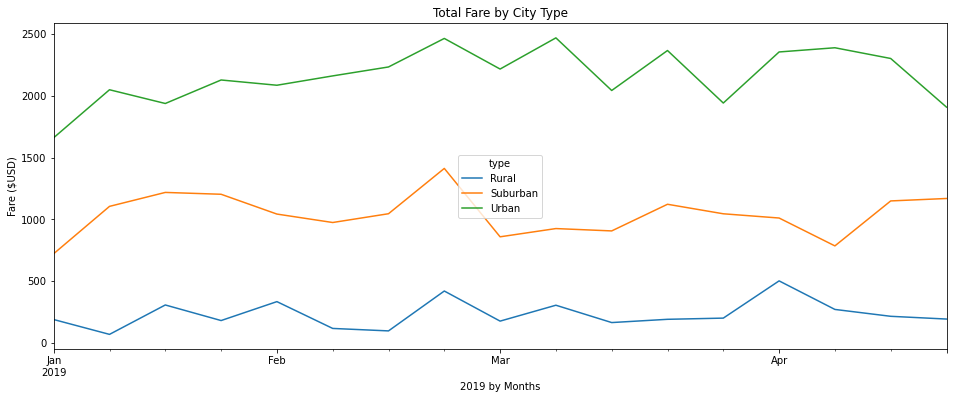

In [49]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
# Use object-oriented interface method and df.pot() method


# Import the style from Matplotlib.
from matplotlib import style
# Use object-oriented interface method and df.pot() method

ax = jan_apr_fare_per_week.plot(figsize=(16,6))
ax.plot()
ax.set_title('Total Fare by City Type')
ax.set_ylabel('Fare ($USD)')
ax.set_xlabel('2019 by Months')

# Use the graph style fivethirtyeight. --- From MatLab
style.use('fivethirtyeight')
plt.savefig("analysis/PyBer_fare_summary.png")
plt.show()